## Importing Required Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## Reading Data from Excel

In [2]:
data = pd.read_csv('Data/CarPrice_Assignment.csv')
data = data.set_index('car_ID') 

In [3]:
encoding=LabelEncoder()

data["fueltype"] = encoding.fit_transform(data["fueltype"])
data["aspiration"] = encoding.fit_transform(data["aspiration"])
data["doornumber"] = encoding.fit_transform(data["doornumber"])
data["carbody"] = encoding.fit_transform(data["carbody"])
data["drivewheel"] = encoding.fit_transform(data["drivewheel"])
data["enginetype"] = encoding.fit_transform(data["enginetype"])
data["cylindernumber"] = encoding.fit_transform(data["cylindernumber"])
data["enginelocation"] = encoding.fit_transform(data["enginelocation"])
data["fuelsystem"] = encoding.fit_transform(data["fuelsystem"])

## Preprocessing Data

In [108]:
# Converting to numpy
X = data.iloc[:,2:24].to_numpy(copy=True)
Y = data['price'].to_numpy(copy=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Normalizing
sc = StandardScaler(); minmax = MinMaxScaler()
X_train = sc.fit_transform(X_train); X_test = sc.transform(X_test)
y_train = minmax.fit_transform(y_train.reshape(-1,1)); y_test = minmax.transform(y_test.reshape(-1,1))

## Creating Model

### The MSE loss function intensifes the effect of outliers and on the other hand the MAE loss fuction doesn't perform well on outliers, So to compensate both disadvantages, the parameters are chosen like below

In [139]:
ep = 100; # epoch number
e_1 = 0.2; e_2 = 0.1
l_1 = 0.7; l_2 = 0.9; l_3 = 1 

In [1]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation = "relu", kernel_initializer = tf.keras.initializers.Zeros()),
    keras.layers.Dense(50, activation = "relu", kernel_initializer = tf.keras.initializers.Zeros()),
    keras.layers.Dense(50, activation = "relu", kernel_initializer = tf.keras.initializers.Zeros()),
    keras.layers.Dense(1,  activation = "tanh", kernel_initializer = tf.keras.initializers.Zeros())
])

class My_loss(keras.losses.Loss):
     
    def __init__(self, e1, e2, l1, l2, l3, **kwargs):
        self.e1 = e1; self.e2 = e2
        self.l1 = l1; self.l2 = l2; self.l3 = l3
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = tf.abs(y_true - y_pred)
        return tf.experimental.numpy.select([error <= self.e2,
                                             error < self.e1,
                                             error >= self.e1], 
                                            [self.l3*error, self.l2*error, self.l1*error])
    def get_config(self):
        parent_config = super().get_config()
        return {**parent_config, "e1":self.e1, "e2":self.e2, "l1":self.l1, "l2":self.l2, "l3":self.l3}

NameError: name 'keras' is not defined

In [2]:
model.compile(loss=My_loss(e1=e_1, e2=e_2, l1=l_1, l2=l_2, l3=l_3),
              optimizer="Adam",
              metrics=["mean_absolute_error"])
history = model.fit(X_train, y_train, epochs = ep, validation_data = (X_test, y_test), verbose = 0)

NameError: name 'model' is not defined

In [112]:
model2 = tf.keras.models.clone_model(model)
model2.compile(loss='mean_squared_error',
              optimizer="Adam",
              metrics=["mean_absolute_error"])

history2 = model2.fit(X_train, y_train, epochs = ep, validation_data = (X_test, y_test), verbose = 0)

In [113]:
model3 = tf.keras.models.clone_model(model)
model3.compile(loss='mean_absolute_error',
              optimizer="Adam",
              metrics=["mean_absolute_error"])

history3 = model3.fit(X_train, y_train, epochs = ep, validation_data = (X_test, y_test), verbose = 0)

## Plotting the Results

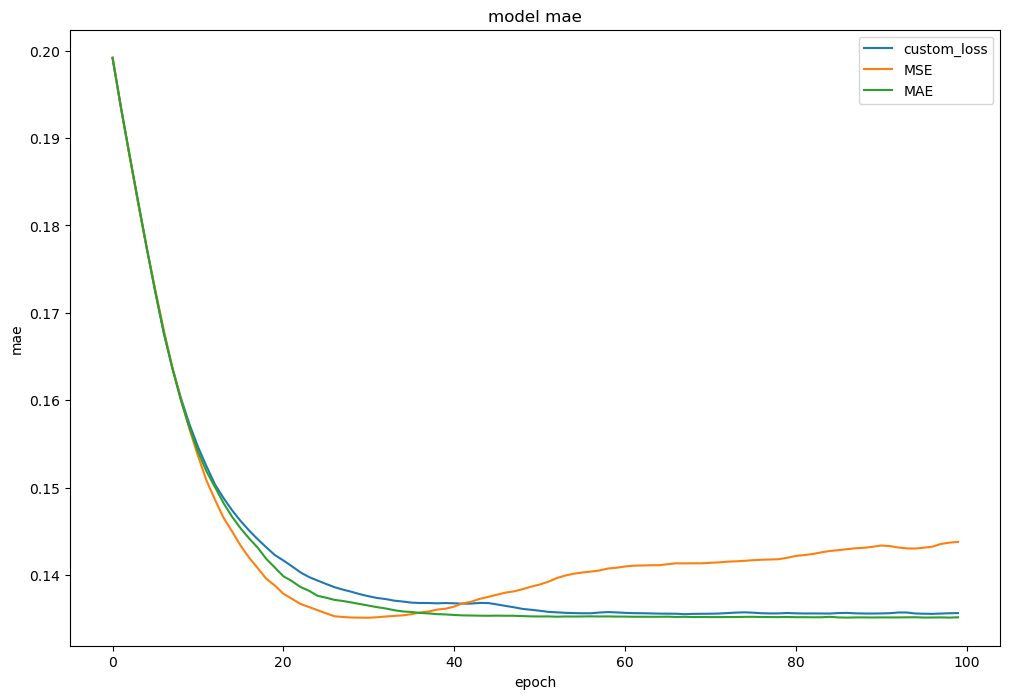

In [142]:
plt.figure(figsize=(12,8))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history3.history['mean_absolute_error'])
plt.title('model mae'); plt.ylabel('mae'); plt.xlabel('epoch')
plt.legend(['custom_loss', 'MSE','MAE'], loc='upper right')
plt.show()

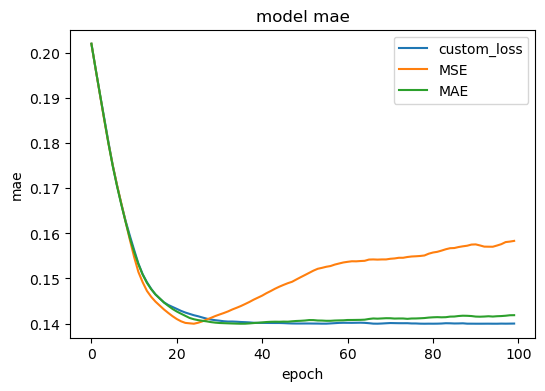

In [132]:
plt.figure(figsize=(6,4))
plt.plot(history.history['val_mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.plot(history3.history['val_mean_absolute_error'])
plt.title('model mae'); plt.ylabel('mae'); plt.xlabel('epoch')
plt.legend(['custom_loss', 'MSE','MAE'], loc='upper right')
plt.show()